In [10]:
import pickle
#with open("2_0_0_analysisdata/2_0_0mpi_run_results30.pkl","rb")as f:
with open("2_0_0_analysisdata/2_0_0mpi_run_results30_005to0.pkl","rb")as f:
    results = pickle.load(f)
size=30

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [12]:
%%time
arr = np.asarray([r[0] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_params = np.asarray([r[1] for r in results ]).reshape( int(len(results)**0.5),-1,4)
arr_thres1 = np.asarray([r[1][0] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_thres2 = np.asarray([r[1][1] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_vol1 = np.asarray([r[1][2] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_vol2 = np.asarray([r[1][3] for r in results ]).reshape( int(len(results)**0.5),-1) 

CPU times: total: 766 ms
Wall time: 1.13 s


Text(0.5, 0, 'threshold2')

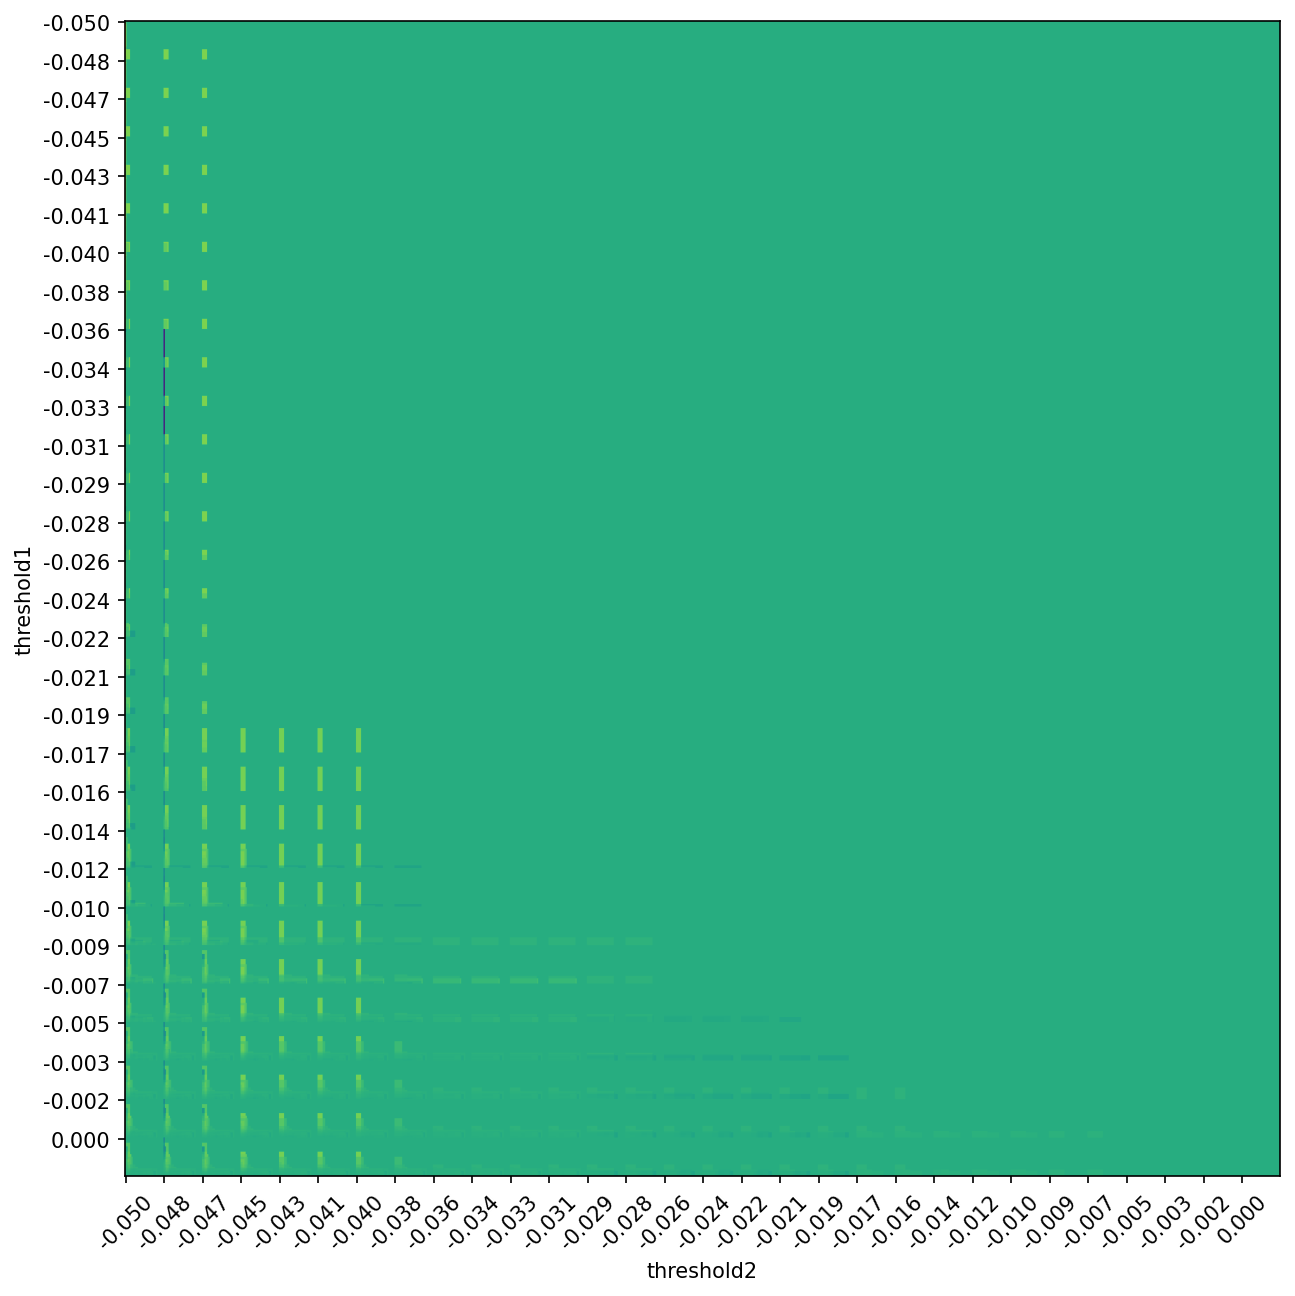

In [36]:
fig,ax=plt.subplots(dpi=150,figsize=(10,10))
ax.imshow(arr,interpolation=None)
ax.set_yticks(np.arange(0,900,30));
yvals = sorted(set(arr_params[:,:,0].reshape(-1)))
ax.set_yticklabels([f"{y:.3f}" for y in yvals]);
ax.set_ylabel("threshold1")
ax.set_xticks(np.arange(0,900,30));
xvals = sorted(set(arr_params[:,:,1].reshape(-1)))
ax.set_xticklabels([f"{x:.3f}" for x in xvals],rotation=45);
ax.set_xlabel("threshold2")

In [5]:
%%time
size=30
arr_params = np.asarray([r[1] for r in results ]).reshape( size,size,size,size,4)
arr_params2 = np.transpose(arr_params,axes=(2,3,0,1,-1))
#arr_params = np.asarray([r[1] for r in results ]).reshape( int(len(results)**0.5),-1,4)

CPU times: total: 281 ms
Wall time: 456 ms


In [6]:
arr_params.shape,arr_params2.shape

((30, 30, 30, 30, 4), (30, 30, 30, 30, 4))

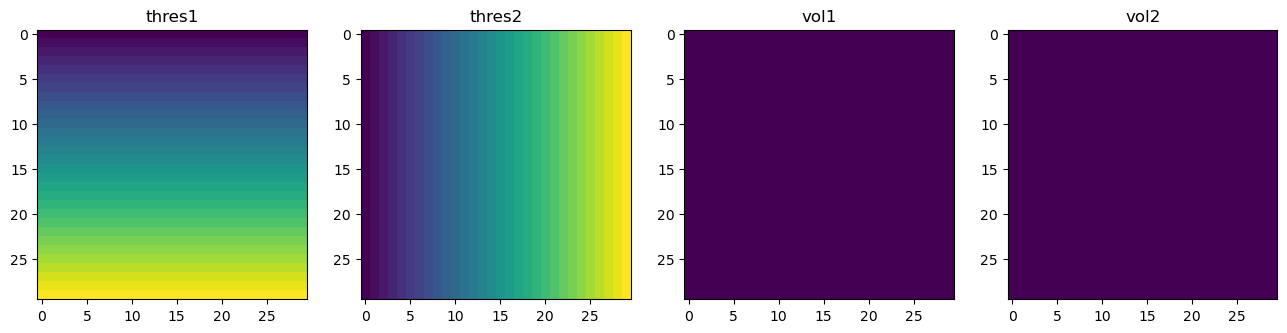

In [7]:
fig,axx=plt.subplots(1,4,figsize=(16,4))
#ax=axx[0]
for  i,(ax,title) in enumerate(zip(axx,["thres1","thres2","vol1","vol2"])):
    ax.imshow(arr_params2[2,15,:,:,i])
    ax.set_title(title)

In [8]:
%%time
arr = np.asarray([r[0] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_vol =np.asarray([r[0] for r in results ]).reshape( size,size,size,size)
arr_vol = np.transpose(arr_vol,axes=(2,3,0,1))
arr_vol = arr_vol.reshape(size**2,size**2)

CPU times: total: 219 ms
Wall time: 286 ms


CPU times: total: 469 ms
Wall time: 585 ms


Text(0.5, 0, 'volume2')

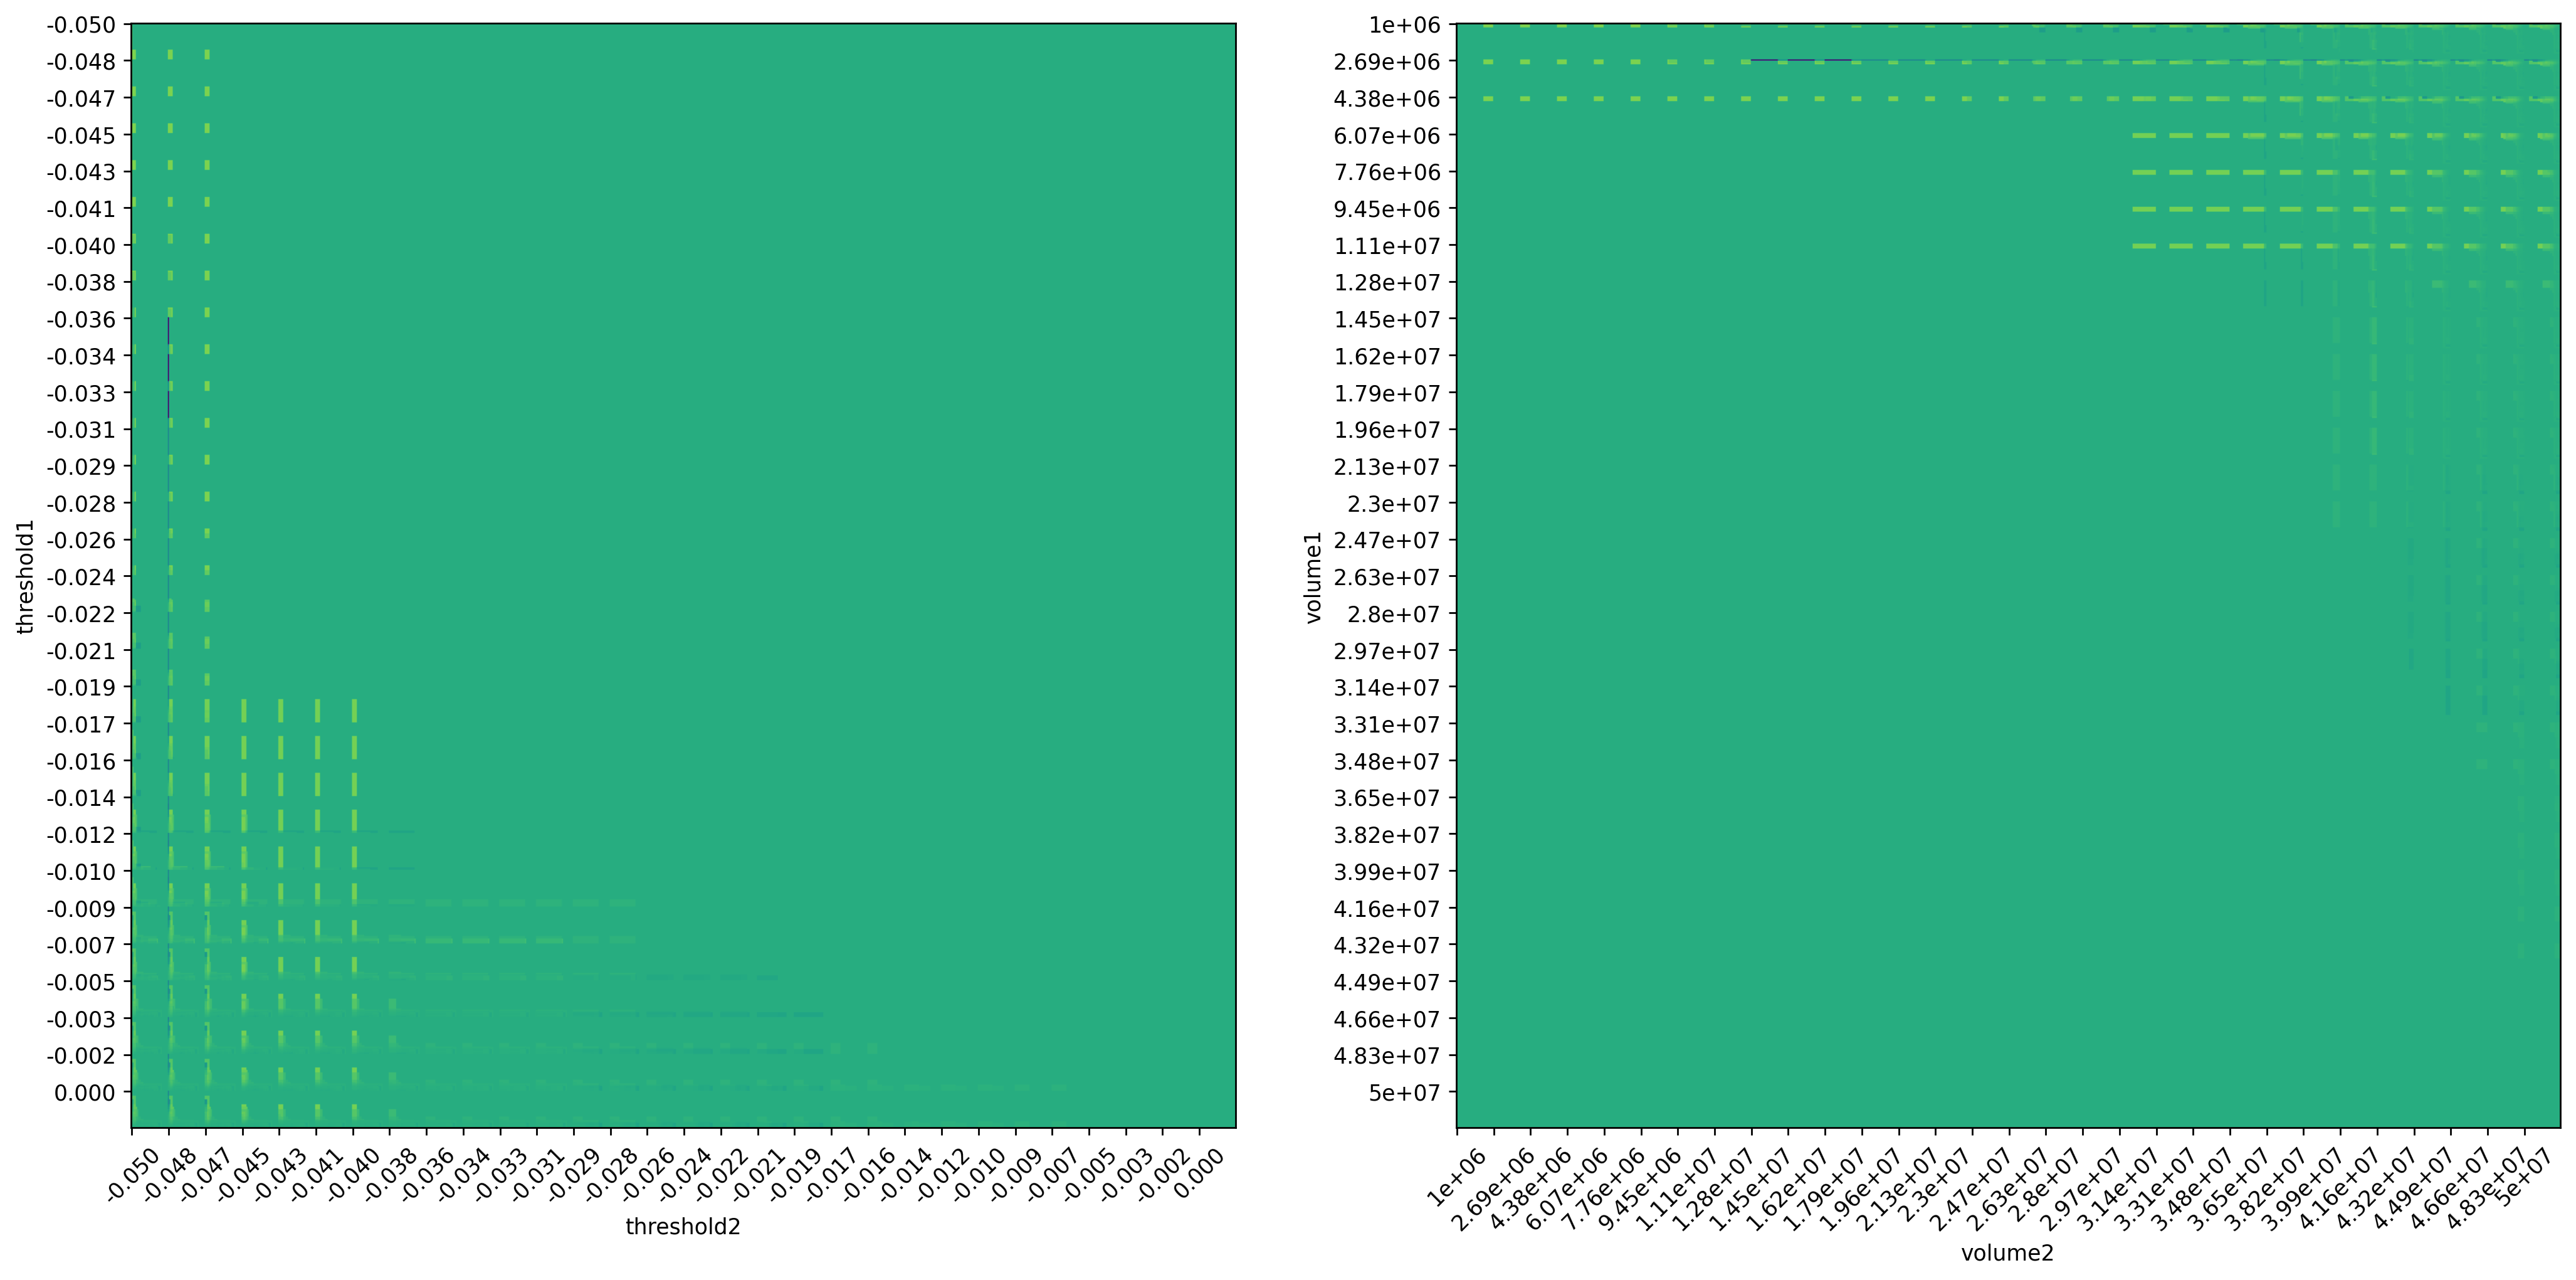

In [41]:
%%time
fig,axx=plt.subplots(1,2,dpi=250,figsize=(20,10))
ax=axx[0]
ax.imshow(arr,interpolation=None)
#ax.set_xlabel("change")

ax.set_yticks(np.arange(0,900,30));
yvals = sorted(set(arr_params[:,:,0].reshape(-1)))
ax.set_yticklabels([f"{y:.3f}" for y in yvals]);
ax.set_ylabel("threshold1")
ax.set_xticks(np.arange(0,900,30));
xvals = sorted(set(arr_params[:,:,1].reshape(-1)))
ax.set_xticklabels([f"{x:.3f}" for x in xvals],rotation=45);
ax.set_xlabel("threshold2")

ax=axx[1]
ax.imshow(arr_vol,interpolation=None)
#ax.set_xlabel("volume")

ax.set_yticks(np.arange(0,900,30));
yvals = sorted(set(arr_params[:,:,2].reshape(-1)))
ax.set_yticklabels([f"{y:.3g}" for y in yvals]);
ax.set_ylabel("volume1")
ax.set_xticks(np.arange(0,900,30));
xvals = sorted(set(arr_params[:,:,3].reshape(-1)))
ax.set_xticklabels([f"{x:.3g}" for x in xvals],rotation=45);
ax.set_xlabel("volume2")


In [99]:
arr_num_trades = np.asarray([r[2] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_std = np.asarray([np.std(r[3]) if r[3] else -99 for r in results ]).reshape( int(len(results)**0.5),-1)

In [104]:
row,col = np.where((arr>0.0041)& (arr<0.5)&(arr_num_trades>30)&(arr_num_trades<100))
row,col = np.where((arr>0.0041)& (arr>arr_std-0.0051)&(arr_num_trades>30)&(arr_num_trades<100))
#row,col = np.where(arr==0.016196886832141322)
result_locs = row*900+col
"num of params",len(result_locs),"trading period",55000/60/24,"days"

('num of params', 18, 'trading period', 38.19444444444444, 'days')

In [150]:
order = np.argsort([np.std(results[r_loc][3]) for r_loc in result_locs])
for r_loc in result_locs[order]:
    print(results[r_loc][:3])
    profits=results[r_loc][3]
    winpercent=len(np.where((np.asarray(profits)-0.002)>0)[0])/len(profits)
    print(np.std(results[r_loc][3]),r_loc,winpercent)

(0.005256525355261665, (-0.006896551724137931, -0.0017241379310344793, 2689655.1724137934, 4379310.344827587), 32)
0.005870046957301924 700232 0.71875
(0.004158632635081774, (-0.0017241379310344793, -0.005172413793103445, 2689655.1724137934, 4379310.344827587), 40)
0.005875395262383573 779432 0.525
(0.005028273254076063, (0.0, -0.006896551724137931, 2689655.1724137934, 4379310.344827587), 32)
0.005911053124447779 805532 0.59375
(0.004255694799631333, (-0.0034482758620689655, -0.0034482758620689655, 2689655.1724137934, 4379310.344827587), 37)
0.0059866972230852205 753332 0.6216216216216216
(0.004266256483098208, (-0.006896551724137931, 0.0, 2689655.1724137934, 4379310.344827587), 37)
0.006334307672179889 701132 0.6756756756756757
(0.004772087422059412, (-0.005172413793103445, -0.0034482758620689655, 2689655.1724137934, 4379310.344827587), 31)
0.006396478089729388 726332 0.6451612903225806
(0.004358347118471541, (0.0, -0.006896551724137931, 1000000.0, 4379310.344827587), 36)
0.0063988974

# low volume then high volume, -0% then -5%

# what are the win% of these? what are the number of trades?

In [108]:
700232
(-0.006896551724137931, -0.0017241379310344793, 2689655.1724137934, 4379310.344827587)

(-0.006896551724137931,
 -0.0017241379310344793,
 2689655.1724137934,
 4379310.344827587)

Text(0, 0.5, 'change per trade')

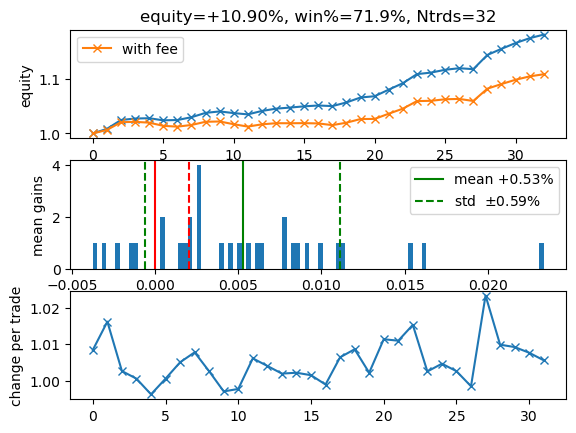

In [149]:
fig,axx=plt.subplots(3,1,)
profits = results[700232][3]
winpercent=len(np.where((np.asarray(profits)-0.002)>0)[0])/len(profits)
ax=axx[0]
ax.set_ylabel("equity")
equity = [1]
equity_fee = [1]
for p in profits:
    equity.append(equity[-1]*(1+p))
    equity_fee.append(equity_fee[-1]*(1+p-0.002))
ax.plot(equity,"-x")
ax.plot(equity_fee,"-x",label="with fee")
ax.legend()
ax.set_title(f"equity={equity_fee[-1]-1:+.2%}, win%={winpercent:.1%}, Ntrds={len(profits)}")

ax=axx[1]
ax.hist(profits,bins=100);
ax.axvline(0.002,c="r",ls="--")
ax.axvline(0.0,c="r")
ax.axvline(np.mean(profits),c="g",label=f"mean {np.mean(profits):+.2%}")
ax.axvline(np.mean(profits)+np.std(profits),c="g",ls="--",label=f"std  $\pm${np.std(profits):.2%}")
ax.axvline(np.mean(profits)-np.std(profits),c="g",ls="--")
ax.set_ylabel("mean gains")
ax.legend()
ax=axx[2]
ax.plot(np.asarray(profits)+1,"-x")
ax.set_ylabel("change per trade")

In [157]:
import time
time.time()

1691251762.2727606

In [42]:
(-0.05, -0.04655172413793104, 1000000.0, 1000000.0)

(-0.05, -0.04655172413793104, 1000000.0, 1000000.0)

In [48]:
np.where([r[0]>0.02 for r in results])

(array([     0,    900,   1800,   2700,   3600,   4500,   5400,   6300,
          7200,   8100,   9000,   9900,  10800,  11700,  12600,  13500,
         14400,  15300,  16200,  17100,  18000,  18900,  19800,  20700,
         21600,  22500,  23400,  27000,  27900,  28800,  29700,  30600,
         31500,  32400,  33300,  34200,  35100,  36000,  36900,  37800,
         38700,  39600,  40500,  41400,  42300,  43200,  44100,  54000,
         54900,  55800,  56700,  57600,  58500,  59400,  60300,  61200,
         62100,  63000,  63900,  64800,  65700,  66600,  67500,  68400,
         69300,  70200,  71100,  81000,  81900,  82800,  83700,  84600,
         85500,  86400,  87300,  88200,  89100,  90000,  90900,  91800,
         92700,  93600,  94500,  95400,  96300,  97200,  98100, 108000,
        108900, 109800, 110700, 111600, 112500, 113400, 114300, 115200,
        116100, 135000, 135900, 136800, 137700, 138600, 139500, 140400,
        141300, 142200, 143100, 162000, 162900, 163800, 164700, 

In [26]:
%%time
arr = np.asarray([r[2] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_vol =np.asarray([r[2] for r in results ]).reshape( size,size,size,size)
arr_vol = np.transpose(arr_vol,axes=(2,3,0,1))
arr_vol = arr_vol.reshape(size**2,size**2)

CPU times: total: 109 ms
Wall time: 250 ms


CPU times: total: 46.9 ms
Wall time: 74.1 ms


Text(0.5, 0, '(counts) volume')

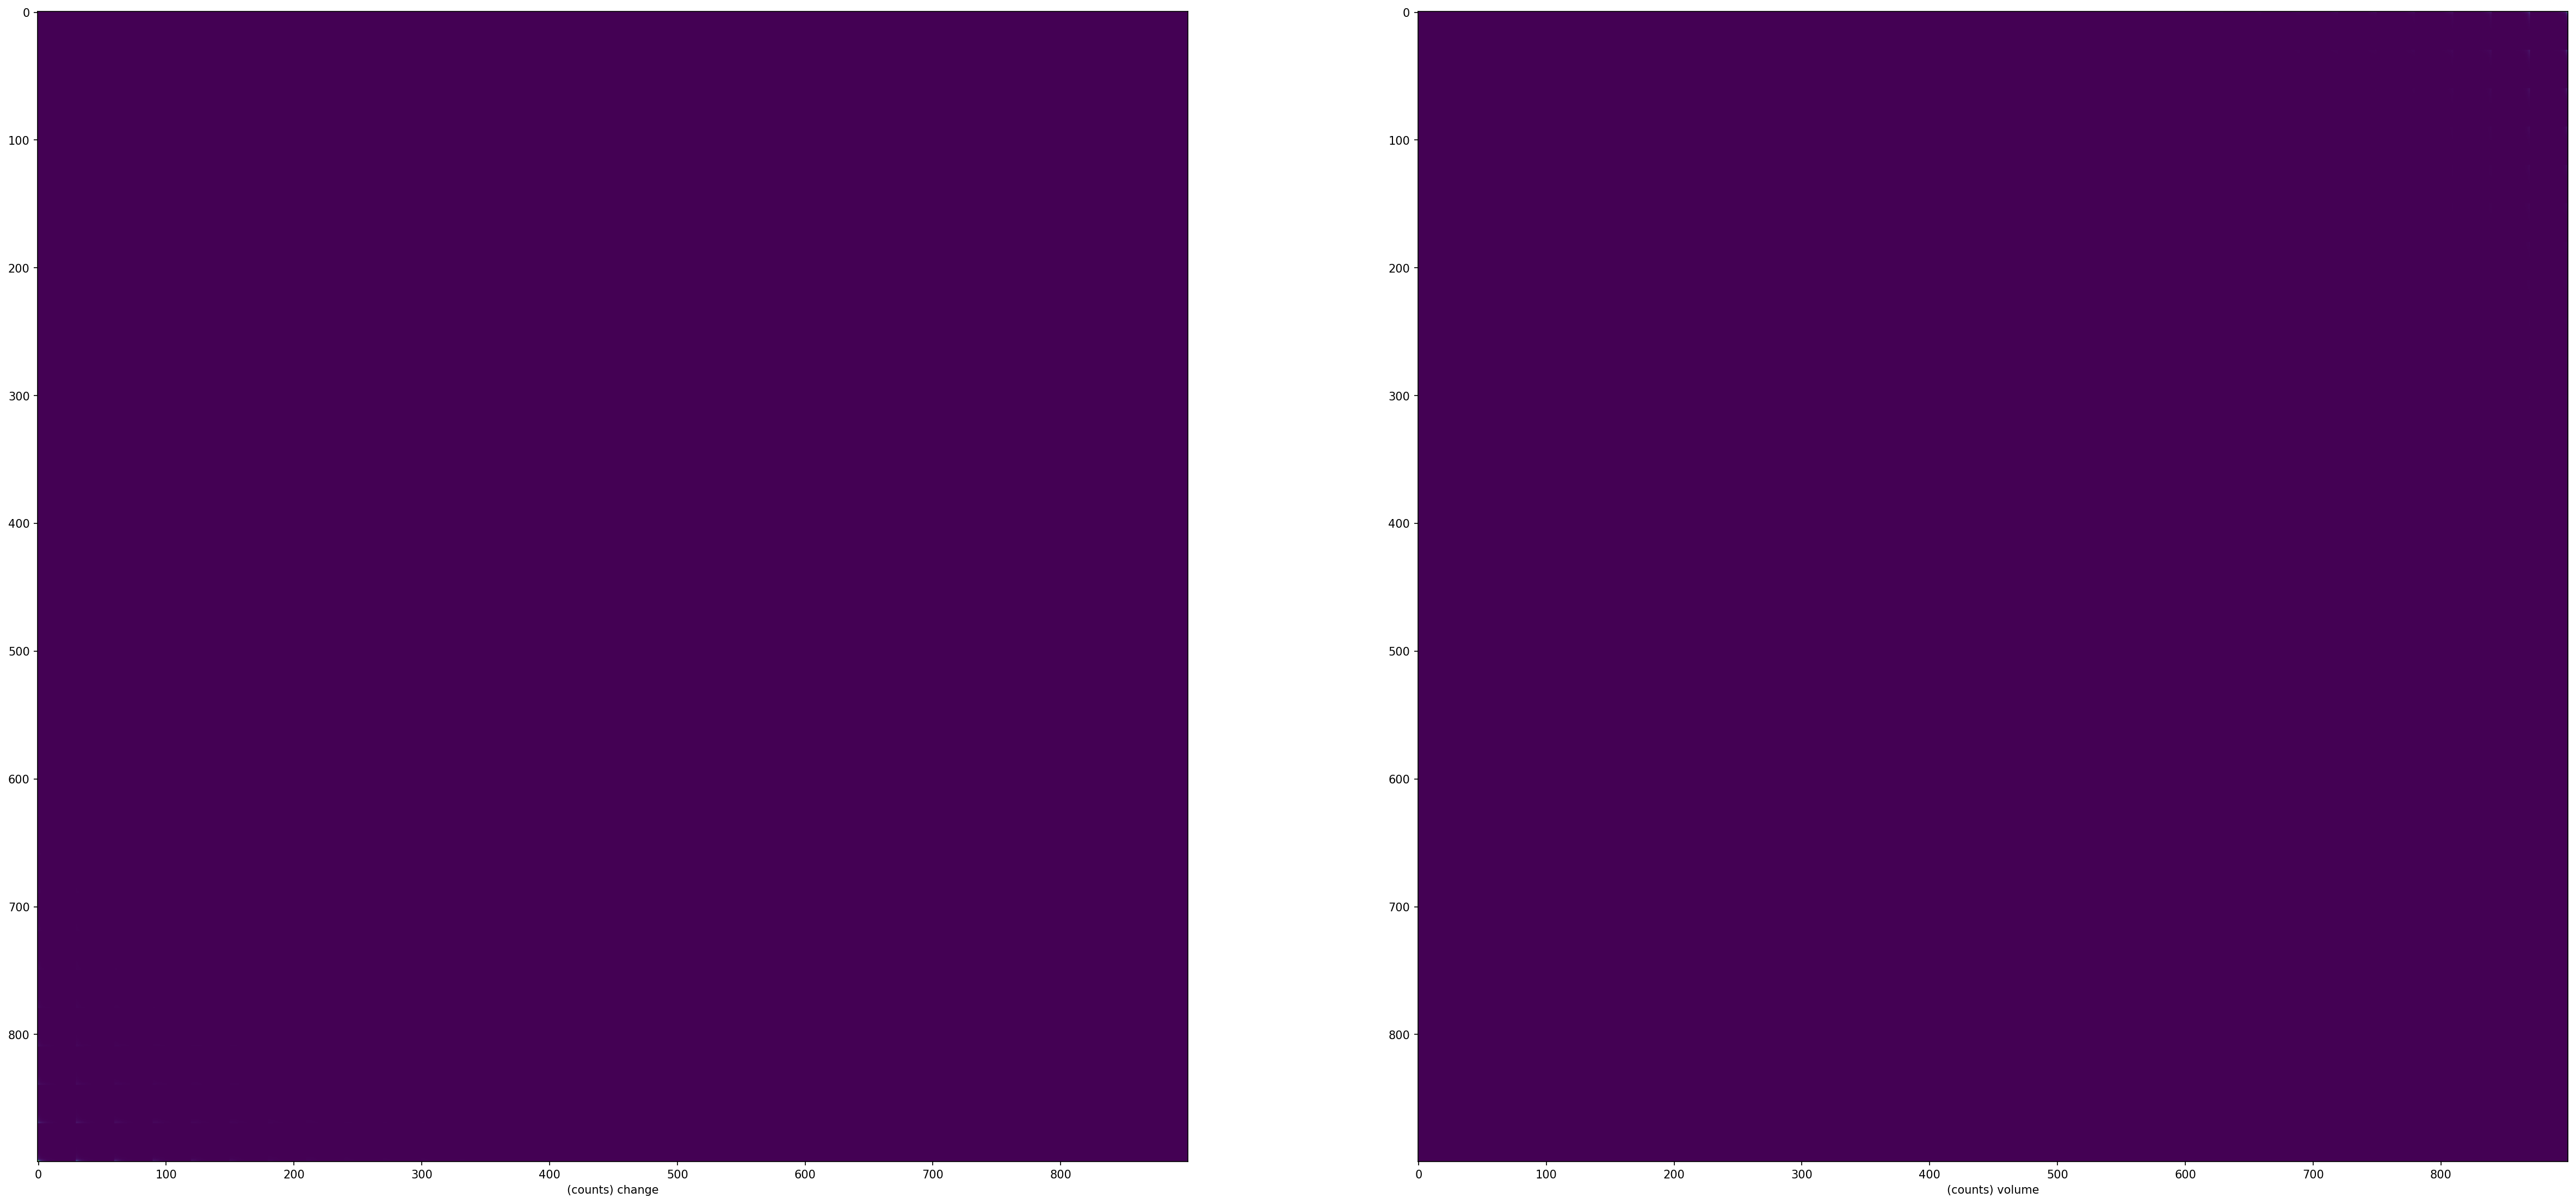

In [27]:
%%time
fig,axx=plt.subplots(1,2,dpi=150,figsize=(40,20))
axx[0].imshow(arr,interpolation=None)
axx[0].set_xlabel("(counts) change")
axx[1].imshow(arr_vol,interpolation=None)
axx[1].set_xlabel("(counts) volume")

Text(0.5, 1.0, 'trades')

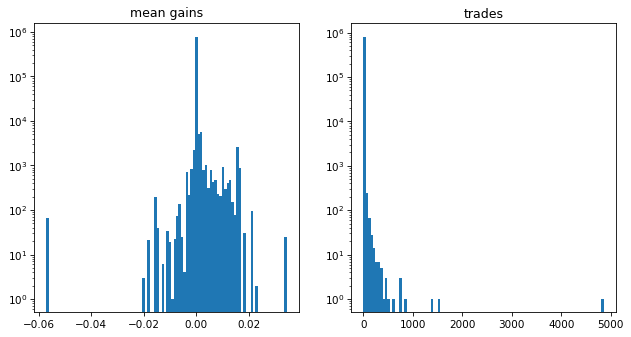

In [34]:
fig,axx =plt.subplots(1,2,figsize=(10,5),dpi=75)
axx[0].hist(np.asarray([r[0] for r in results ]),bins=100);
axx[0].set_yscale("log")
axx[0].set_title("mean gains")
axx[1].hist(np.asarray([r[2] for r in results ]),bins=100);
axx[1].set_yscale("log")
axx[1].set_title("trades")

Text(0, 0.5, 'counts')

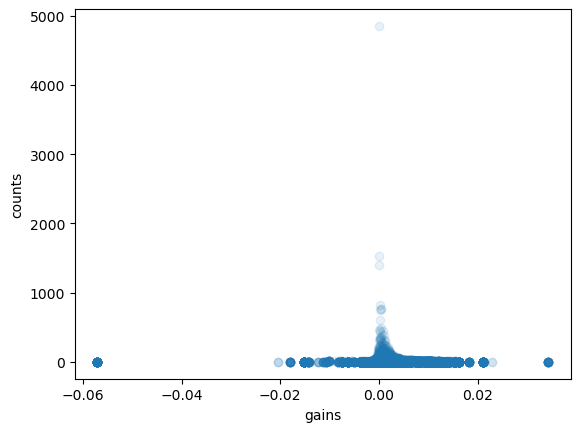

In [36]:
%%time
plt.scatter([r[0] for r in results ],[r[2] for r in results ],alpha=0.1)
plt.xlabel("gains")
plt.ylabel("counts")